# **Long Short Term Memory (LSTM) Recurrent Neural Network: Wikipedia Web Traffic**



IE7860 

Assignment-5

Priyanka Patil

## ***Introduction*** 

A Long Short Term Memory (LSTM) Recurrent Neural Network will be used to predict the number of visits (traffic) to the Wikipedia website.  Each of the time series in the dataset represent a number of daily views of a different Wikipedia article starting from July 1st, 2015 until December 31st, 2016.

## ***Dataset***

The source of the data is from Kaggle [link](https://www.kaggle.com/c/web-traffic-time-series-forecasting/data).

The dataset is a time series dataset with 145,063 entries and 551 columns.  The dataset uses 609.8+ MB of memory!  The original data contained two sets of data, but I was only able to work with one set because of the  huge memory usage.

The dataset does not distinguish between traffic values of zero and missing values. A missing value may mean the traffic was zero or that the data is not available for that day.  For accurate representation, any null value was imputed to the mean value of traffic/visits for that day.

There are 145,063 observations with 551 columns which represent the following:

1. Page (Article visited by all kinds of devices)
2. Dates from July 1, 2015 through December 31, 2016 (550 Columns).

## *Import Libraries*

In [1]:
#Loading necessary packages for this machine learning analysis.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import LeaveOneOut, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import sklearn.ensemble

In [3]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading Keras/TensorFlow,significant packages for machine learning.
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras import regularizers
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import categorical_crossentropy

## *Load Dataset*

In [4]:
#Dataset of web traffic was saved into my bucket in google cloud.
raw_data= pd.read_csv('https://storage.googleapis.com/mydata-777/train_1.csv')
raw_data

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
raw_data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

## ***Cleaning Data***

In [7]:
#Dropping 'Page' column because not needed for analysis.
data = raw_data.drop(['Page'], axis=1)
data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
2015-07-05    20659
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 550, dtype: int64

In [9]:
#Imputing missing data.
data.fillna(data.mean(), inplace=True)

In [10]:
#Checking to see imputation worked and no missing values anymore.
data.isnull().sum()

2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
2015-07-05    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 550, dtype: int64

In [11]:
#Need to unpivot DataFrame from wide to long format.
data_melt = data.melt(var_name="date", value_name="traffic")

data_melt['date'] = pd.to_datetime(data_melt['date'])

data_melt

,date,traffic
0,2015-07-01,18.000000
1,2015-07-01,11.000000
2,2015-07-01,1.000000
3,2015-07-01,35.000000
4,2015-07-01,1195.856567
...,...,...
79784645,2016-12-31,10.000000
79784646,2016-12-31,1478.282137
79784647,2016-12-31,1478.282137
79784648,2016-12-31,1478.282137


In [12]:
data_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79784650 entries, 0 to 79784649
Data columns (total 2 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   traffic  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 GB


In [13]:
#Grouping similar dates and calculating mean of traffic for same dates.
data_gr=data_melt.groupby(['date']).mean().reset_index()
data_gr

,date,traffic
0,2015-07-01,1195.856567
1,2015-07-02,1204.003638
2,2015-07-03,1133.675969
3,2015-07-04,1170.437324
4,2015-07-05,1217.769300
...,...,...
545,2016-12-27,1678.301870
546,2016-12-28,1633.965605
547,2016-12-29,1684.307717
548,2016-12-30,1467.943378


In [14]:
#Changing date format to MM/DD/YYYY.
data_gr['date'] = data_gr['date'].dt.strftime('%m/%d/%Y')

data_gr['date']

0      07/01/2015
1      07/02/2015
2      07/03/2015
3      07/04/2015
4      07/05/2015
          ...    
545    12/27/2016
546    12/28/2016
547    12/29/2016
548    12/30/2016
549    12/31/2016
Name: date, Length: 550, dtype: object

In [15]:
data_gr

,date,traffic
0,07/01/2015,1195.856567
1,07/02/2015,1204.003638
2,07/03/2015,1133.675969
3,07/04/2015,1170.437324
4,07/05/2015,1217.769300
...,...,...
545,12/27/2016,1678.301870
546,12/28/2016,1633.965605
547,12/29/2016,1684.307717
548,12/30/2016,1467.943378


As seen from above new dataframe, the original dataframe was massaged into a format where the time columns, which are considered measured variables (value_vars), are “unpivoted” to the row axis.

Then the data was grouped by the date, and the mean of traffic for that day was calculated.

The final dataframe shows the mean observations calculated every day from 07/01/105 to 12/31/2016.

To make a prediction, the 550 observations will be split into two halves.  Thus, a window containing the last 225 observations will be created to train the model.

## ***Visualization of Dataset***

In [16]:
uni_data = data_gr['traffic']
uni_data.index = data_gr['date']
uni_data.head()

date
07/01/2015    1195.856567
07/02/2015    1204.003638
07/03/2015    1133.675969
07/04/2015    1170.437324
07/05/2015    1217.769300
Name: traffic, dtype: float64

Text(0.5, 1.0, 'Time Series Plot of Wikipedia Web Traffic')

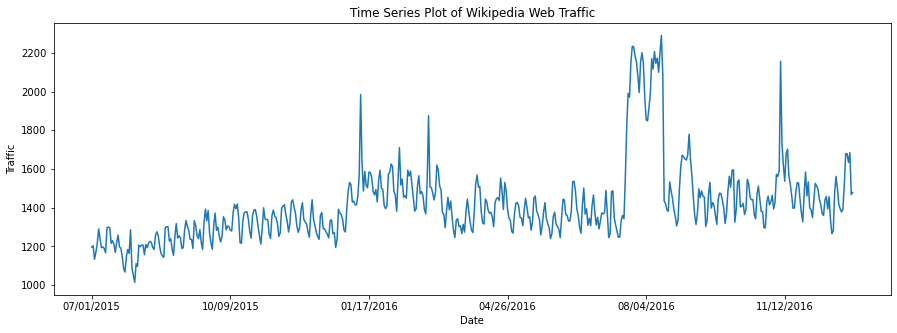

In [17]:
#Plot of date and traffic
plt.figure(figsize = (15,5))
uni_data.plot(subplots=True)

plt.xlabel('Date',fontsize=10)
plt.ylabel('Traffic',fontsize=10)
plt.title('Time Series Plot of Wikipedia Web Traffic')

## ***Experimental Test Setup***

The Wikipedia Web Traffic dataset will be split into two parts: a training and test set.

The first half of data will be taken for the training dataset and the remaining half of data will be used for the test set.

In [18]:
#Split data into train and test
X = uni_data.values
train, test = X[0:-225], X[-225:]

test

array([1308.05112369, 1375.35299998, 1426.10235064, 1345.09909864,
       1318.30568231, 1297.11307049, 1240.61576525, 1265.12319851,
       1355.32925431, 1376.69341327, 1316.4807073 , 1303.45276201,
       1288.98615611, 1245.08205748, 1348.81607314, 1443.84522433,
       1440.1256736 , 1364.22921822, 1359.40528193, 1330.78795373,
       1332.29340884, 1380.89515035, 1533.95644441, 1535.94154621,
       1485.85114365, 1393.55072559, 1360.87528394, 1297.504973  ,
       1267.9904152 , 1413.68564137, 1501.62115936, 1366.85713869,
       1393.89496488, 1309.84735137, 1345.6398335 , 1307.35641186,
       1412.25217588, 1465.60274312, 1374.82046702, 1310.85177499,
       1350.30884079, 1290.3354068 , 1330.94281014, 1373.35732644,
       1367.90789896, 1375.26911112, 1489.49466999, 1371.4892369 ,
       1245.66383454, 1263.44934753, 1482.80409832, 1487.30583153,
       1347.26143791, 1310.5744721 , 1278.04110394, 1246.84065978,
       1249.39410526, 1335.4350427 , 1360.02195725, 1343.03920

Models will be developed using the training dataset and will make predictions on the test dataset.

A rolling forecast scenario will be used, also called walk-forward model validation.

Each time step of the test dataset will be walked one at a time. A model will be used to make a forecast for the time step, then the actual expected value from the test set will be taken and made available to the model for the forecast on the next time step.



In [19]:
#Walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])

Finally, all forecasts on the test dataset will be collected and an error score calculated to summarize the skill of the model. The root mean squared error (RMSE) will be used as it punishes large errors and results in a score that is in the same units as the forecast data.

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 106.398


## ***Persistence Model Forecast***

A good baseline forecast for a time series with a linear increasing trend is a persistence forecast.

The persistence forecast is where the observation from the prior time step (t-1) is used to predict the observation at the current time step (t).

We can implement this by taking the last observation from the training data and history accumulated by walk-forward validation and using that to predict the current time step.

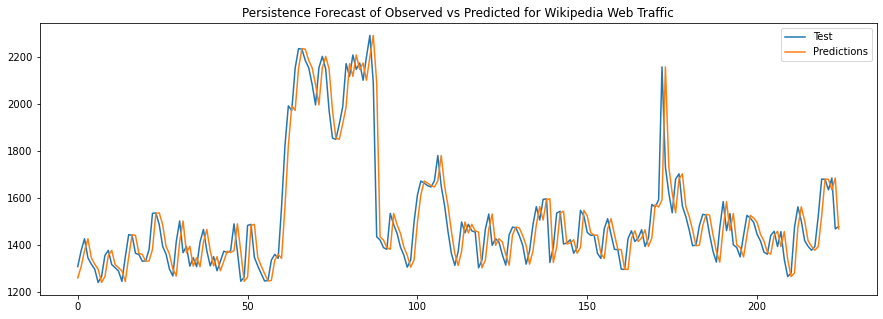

In [21]:
# Plot of observed vs predicted
plt.figure(figsize = (15,5))

plt.plot(test, label='Test')
plt.plot(predictions,label='Predictions')

plt.legend()
plt.title('Persistence Forecast of Observed vs Predicted for Wikipedia Web Traffic')
plt.show()

Now that we have a baseline of performance on the dataset, we can get started developing an LSTM model for the data.

In [22]:
# make prediction
yhat = history[-1]
yhat

1478.282136753525

## ***LSTM Data Preparation***

The code below defines a helper function to do execute timeseries_to_supervised(). It takes a NumPy array of the time series data and a lag, or number of shifted series, to create and use as inputs.

In [23]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [24]:
# transform to supervised learning
X = uni_data.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

             0            0
0     0.000000  1195.856567
1  1195.856567  1204.003638
2  1204.003638  1133.675969
3  1133.675969  1170.437324
4  1170.437324  1217.769300


## ***Transform Time Series to Stationary***

This means that there is a structure in the data that is dependent on the time. Specifically, there is an increasing trend in the data.

Stationary data is easier to model and will very likely result in more skillful forecasts.

The trend can be removed from the observations, then added back to forecasts later to return the prediction to the original scale and calculate a comparable error score.

A standard way to remove a trend is by differencing the data. That is the observation from the previous time step (t-1) is subtracted from the current observation (t). This removes the trend and we are left with a difference series, or the changes to the observations from one time step to the next.

We can achieve this automatically using the diff() function in pandas.

In [25]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [26]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

## ***Standardization***

Like other neural networks, LSTM's expect data to be within the scale of the activation function used by the network.

The default activation function for LSTMs is the hyperbolic tangent (tanh), which outputs values between -1 and 1. This is the preferred range for the time series data.

To make the experiment fair, the scaling coefficients (min and max) values must be calculated on the training dataset and applied to scale the test dataset and any forecasts. This is to avoid contaminating the experiment with knowledge from the test dataset, which might give the model a small edge.

We can transform the dataset to the range [-1, 1] using the MinMaxScaler class. Like other scikit-learn transform classes, it requires data provided in a matrix format with rows and columns. Therefore, we must reshape our NumPy arrays before transforming.

In [27]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [28]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

## ***Fitting Model***

Below, TensorFlow/Keras was used to create a neural network model.

In [29]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)	
        model.reset_states()
    return model              


In [30]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [31]:
# transform data to be stationary
raw_values = uni_data.values
diff_values = difference(raw_values, 1)

In [32]:
diff_values

0        8.147071
1      -70.327669
2       36.761355
3       47.331976
4       72.503890
          ...    
544     -1.304683
545    -44.336265
546     50.342112
547   -216.364339
548     10.338759
Length: 549, dtype: float64

In [33]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [34]:
# split data into train and test-sets
train, test = supervised_values[0:-225], supervised_values[-225:]

In [35]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [36]:
#Fit the model
lstm_model = fit_lstm(train_scaled, 1, 200, 8)
 
#Forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

324/324 - 0s - loss: 0.0378 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0370 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0370 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0363 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0358 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0353 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0349 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0345 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0341 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0338 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0335 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0332 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0330 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0327 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0325 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0323 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0321 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0320 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0318 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0317 - a

324/324 - 0s - loss: 0.0258 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0258 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0258 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0257 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0257 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0257 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0257 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0256 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0256 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0256 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0255 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0255 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0255 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0255 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0254 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0254 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0254 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0253 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0253 - accuracy: 0.0000e+00
324/324 - 0s - loss: 0.0253 - a

array([[-2.35165700e-01],
       [-2.57472783e-01],
       [-2.07856655e-01],
       [-1.49993613e-01],
       [-2.54116505e-02],
       [-7.01696947e-02],
       [-1.09391615e-01],
       [-1.18207410e-01],
       [-9.23876613e-02],
       [-2.07536519e-02],
       [ 2.17561126e-02],
       [-6.35755658e-02],
       [-1.47205412e-01],
       [-1.62874162e-01],
       [-1.29096717e-01],
       [-8.18715841e-02],
       [ 3.07851285e-02],
       [ 8.72144848e-02],
       [ 5.83516657e-02],
       [-7.02411085e-02],
       [-8.49887580e-02],
       [-1.02019377e-01],
       [-5.60598671e-02],
       [ 1.97421014e-03],
       [ 8.55568796e-02],
       [ 1.11456111e-01],
       [-7.85085335e-02],
       [-1.12037182e-01],
       [-1.96276888e-01],
       [-1.05230801e-01],
       [-1.19768783e-01],
       [ 6.59234822e-03],
       [ 2.10688308e-01],
       [ 4.49448228e-02],
       [-1.80381671e-01],
       [-1.64872691e-01],
       [-1.66345403e-01],
       [-1.24154605e-01],
       [-5.7

## ***Evaluate Model***

In [37]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
print('Days=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Days=225, Predicted=1455.377254, Expected=1478.282137


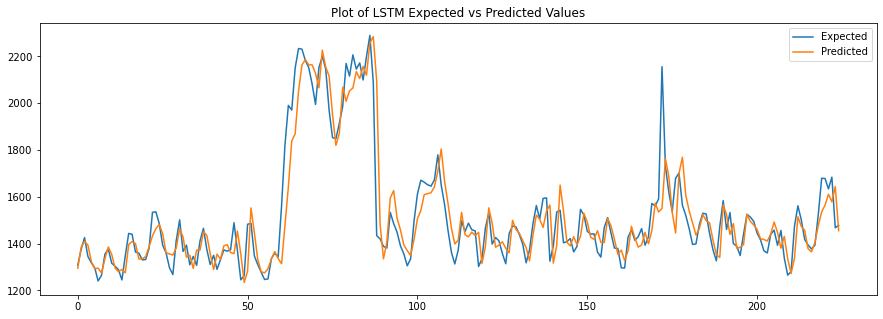

In [38]:
# line plot of observed vs predicted
plt.figure(figsize = (15,5))

plt.plot(raw_values[-225:],label='Expected')
plt.plot(predictions,label='Predicted')

plt.legend()
plt.title('Plot of LSTM Expected vs Predicted Values')
plt.show()

A line plot of the expected data (blue) vs the predicted values (orange) is also created, providing context for the model skill.  Visually it the predicted values shows a good fit to the model.



In [39]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-225:], predictions))
print('Test RMSE: %.3f' % rmse)
print('Predictions:', predictions)

Test RMSE: 101.795
Predictions: [1295.039219495985, 1384.2693628781994, 1410.268265974384, 1393.5046096070525, 1323.5901762116944, 1292.242968705924, 1295.6938856839215, 1274.2596153314353, 1336.074488877779, 1385.9646077316622, 1353.7462591210751, 1295.9223828960478, 1280.359516309064, 1290.0372305912613, 1275.7217930955544, 1396.8663512358983, 1408.7976732842817, 1400.5740406563646, 1334.390964349809, 1335.2564362580754, 1345.0431076697485, 1386.828203327178, 1433.1151261695356, 1464.5839691634742, 1482.0846173152727, 1442.5466079207188, 1361.1372162670878, 1356.1882076925672, 1351.3943168138403, 1381.7913452449939, 1464.2020657525202, 1428.0127382290489, 1342.3990789769564, 1349.992910564477, 1294.295368226288, 1372.928282800413, 1372.8701545545557, 1450.9343479991353, 1435.4600105201782, 1356.9631069069978, 1289.4348063307373, 1355.288366416001, 1333.6215251223823, 1390.4872021468366, 1395.9974460440471, 1362.264325798207, 1357.0603272030824, 1453.7889153273886, 1356.6457368653003,

In [40]:
#Goodness of Fit
from sklearn.metrics import r2_score

#train_pred_lstm = lstm_model.predict(raw_values[-225:])
#pred_test_lstm = lstm_model.predict(yhat)
print("The R2 score is:\t{:0.3f}%".format(r2_score(raw_values[-225:], predictions)*100))

The R2 score is:	82.543%


## ***Conclusion***

In conclusion, the plot of the expected values versus the predicted values matched closely, which means our model is a good predictor.  The R-square factor for this model is 82.54%.  This value indicates that the model fits the observed data very well and provides good predictions for new observations.

Root Mean Square Error (RMSE) is the standard deviation of the residuals or prediction errors. It is calculated as the average of the squared forecast error values. Squaring the forecast error values forces them to be positive; it also has the effect of putting more weight on large errors.

Very large or outlier forecast errors are squared, which in turn has the effect of dragging the mean of the squared forecast errors out resulting in a larger mean squared error score. In effect, the score gives worse performance to those models that make large wrong forecasts.

THe RMSE of this model is 101.795.  This value seems to be understandable since the observations did not show seasonalilty or trend.  There were two high peaks in the plot and the model did its best to predict accordingly however, it seemed to have matched closely but not close enough.  I believe this accounts for the RMSE value.

The model uses 8 neurons, 1 dense layer and 200 epochs.  It was tuned using the Mean Squared Error function and the optimizer, Adam.

The model was trained on half of the data obsercations(225) and the remaining half was used as the test.  The prediction was made on 225 days.

Overall, I believe the model did well.  An R-square of approximately 82.54% is considered a good model.  In addition, the prediction values show that they match the values of observations closely.




